In [1]:
BASEDIR = "."

import pandas
data = pandas.read_csv(
    BASEDIR + '/comparison.log',
    delim_whitespace=True,
    comment='#',
)


In [2]:
data.head()

,Name,nodes,relations,outputs,properties
0,DICE,14,12.0,2.0,2
1,INDIGO,4,6.0,4.0,11
2,Juju,7,8.0,0.2,21
3,oc,1,0.2,0.2,1


In [3]:
data.iloc[1].iloc[1:]

nodes          4
relations      6
outputs        4
properties    11
Name: 1, dtype: object

In [4]:
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt


def create_sane_figure():
    # You typically want your plot to be ~1.33x wider than tall.
    # Common sizes: (10, 7.5) and (12, 9)
    fig = plt.figure(figsize=(12, 6))  # a new figure window
    ax = fig.add_subplot(1, 1, 1)      # specify (nrows, ncols, axnum)

    # Put the axis behind the datapoints
    ax.set_axisbelow(True)
    # Grey ticks, labels, and axis'
    for spine in ax.spines.values():
        spine.set_color('black')
    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_color('black')
    # Don't show a grid
    ax.grid(False)
    # remove top and right border of graph
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(
        axis='both', which='both',
        labelsize=14, labelcolor='black',
        color='black')
    # Make the title big enough so it spans the entire plot, but don't make it
    # so big that it requires two lines to show.
    ax.set_title(None, fontsize=22, color='black')
    return (fig, ax)

#1f77b4
#ff7f0e
#2ca02c
#d62728


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


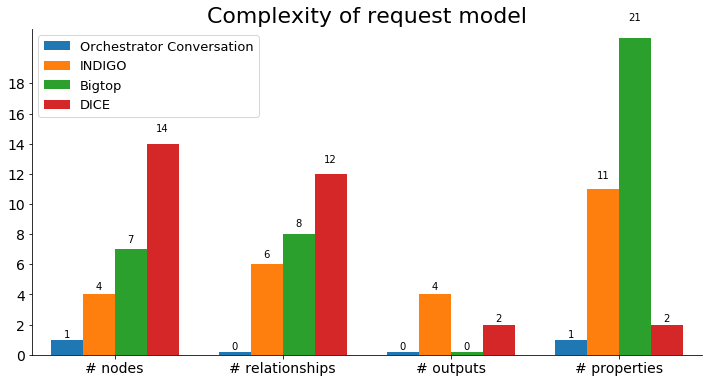

In [5]:
%matplotlib inline

import matplotlib

def autolabel(ax, rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        h_num = height
        if h_num < 1:
            h_num = 0
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(h_num),
                ha='center', va='bottom')
        

def create_concurrency_potential_graph():
    (fig, ax) = create_sane_figure()
    
    ax.set_title("Complexity of request model", fontsize=22)
    ax.set_xlabel("")
    ax.set_ylabel("")

    width = 0.19       # the width of the bars
    x = np.arange(4)
    
    ax.set_xticks(x + width *2-width/2)
    ax.set_xticklabels(['# nodes', '# relationships', '# outputs', '# properties'])
    ax.set_yticks(np.arange(0, 20, 2))

    
    
    # Now put the actual data in the plot
    b1 = ax.bar(x, data.iloc[3].iloc[1:], width, label="Orchestrator Conversation")
    b2 = ax.bar(x+width, data.iloc[1].iloc[1:], width, label='INDIGO')
    b3 = ax.bar(x+2*width, data.iloc[2].iloc[1:], width, label="Bigtop")
    b4 = ax.bar(x+3*width, data.iloc[0].iloc[1:], width, label='DICE')
    
    print(matplotlib.colors.rgb2hex(b1.patches[0].get_facecolor()))
    print(matplotlib.colors.rgb2hex(b2.patches[0].get_facecolor()))
    print(matplotlib.colors.rgb2hex(b3.patches[0].get_facecolor()))
    print(matplotlib.colors.rgb2hex(b4.patches[0].get_facecolor()))

    autolabel(ax, b1)
    autolabel(ax, b2)    
    autolabel(ax, b3)    
    autolabel(ax, b4)    
    
    
    ax.legend()
    ax.legend(loc=2, prop={'size': 13})
    
    ax.margins(0.03)
    # Save the plot to a file
    fig.savefig("comparison.pdf", bbox_inches="tight")
    fig.show()
create_concurrency_potential_graph()

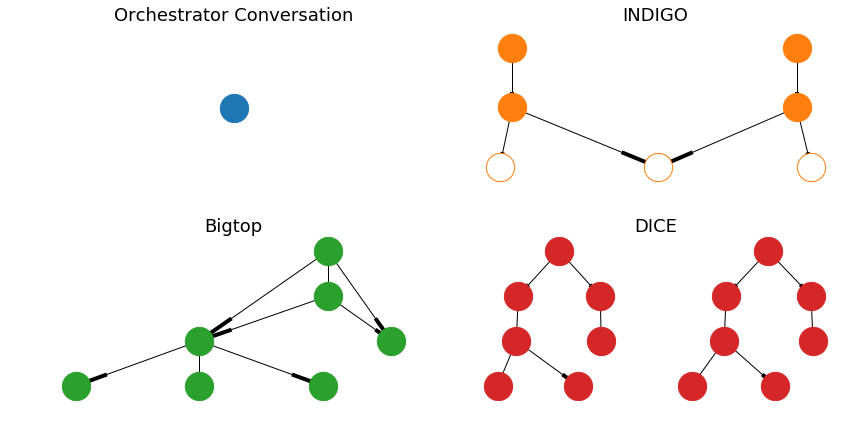

In [6]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # a new figure window


#
#   DICE
#
plt.subplot(224)
plt.title('DICE', fontsize=18)
DICE_G = nx.DiGraph()
DICE_G.add_nodes_from(['nn_ip', 'nn_fw', 'nn_vm', 'nn', 'dn_fw', 'dn_vm', 'dn'])
DICE_G.add_edges_from([
    ('nn_vm', 'nn_fw'),
    ('nn_vm', 'nn_ip'),
    ('nn', 'nn_vm'),
    ('dn_vm', 'dn_fw'),
    ('dn', 'dn_vm'),
    ('dn', 'nn')])
DICE_G.add_nodes_from(['rm_ip', 'rm_fw', 'rm_vm', 'rm', 'nm_fw', 'nm_vm', 'nm'])
DICE_G.add_edges_from([
    ('rm_vm', 'rm_fw'),
    ('rm_vm', 'rm_ip'),
    ('rm', 'rm_vm'),
    ('nm_vm', 'nm_fw'),
    ('nm', 'nm_vm'),
    ('nm', 'rm')])
nx.draw(
    DICE_G, nx.nx_agraph.graphviz_layout(DICE_G, prog='dot'),
    #with_labels=True,
    node_color=(0.83921568627450982, 0.15294117647058825, 0.15686274509803921, 1.0),
    node_size=800,    
)


#
#  INDIGO
#
plt.subplot(222)
plt.title('INDIGO', fontsize=18)
indigo_G = nx.DiGraph()
indigo_G.add_nodes_from([
    'hadoop_master', 'hadoop_server', 'hadoop_slave', 'hadoop_wn',
    'endpoint', 'os', 'scalable'
])
indigo_G.add_edges_from([
    ('hadoop_master', 'hadoop_server'),
    ('hadoop_server', 'endpoint'),
    ('hadoop_server', 'os'),
    ('hadoop_slave', 'hadoop_wn'),
    ('hadoop_wn', 'scalable'),  
    ('hadoop_wn', 'os'),
])
nx.draw(
    indigo_G, nx.nx_agraph.graphviz_layout(indigo_G, prog='dot'),
    #with_labels=True,
    node_color="white",
    edge_color="white",
    
)
nx.draw_networkx_nodes(
    indigo_G, nx.nx_agraph.graphviz_layout(indigo_G, prog='dot'),
    nodelist=['hadoop_master', 'hadoop_server', 'hadoop_slave', 'hadoop_wn'],
    node_color="#ff7f0e",
    node_size=800,
)    
nodes = nx.draw_networkx_nodes(
    indigo_G, nx.nx_agraph.graphviz_layout(indigo_G, prog='dot'),
    nodelist=['endpoint', 'os', 'scalable'],
    node_color="white",
    node_size=800,    
)
nodes.set_edgecolor([(1.0, 0.49803921568627452, 0.054901960784313725, 0.5)]
)


nx.draw_networkx_edges(
    indigo_G, nx.nx_agraph.graphviz_layout(indigo_G, prog='dot'),
    node_color="cornflowerblue",
)    








#
#  bigtop
#
plt.subplot(223)
plt.title('Bigtop', fontsize=18)
Juju_G = nx.DiGraph()
Juju_G.add_nodes_from(['namenode', 'resourcemanager', 'slave', '0', '1', '2', '3'])
Juju_G.add_edges_from([
    ('resourcemanager', 'namenode'),
    ('namenode', 'slave'),
    ('resourcemanager', 'slave'),
    ('namenode', '0'),
    ('resourcemanager', '0'),
    ('slave', '1'),
    ('slave', '2'),
    ('slave', '3'),
])
nx.draw(
    Juju_G, nx.nx_agraph.graphviz_layout(Juju_G, prog='dot'),
    #with_labels=True,
    node_color=(0.17254901960784313, 0.62745098039215685, 0.17254901960784313, 1.0),
    node_size=800,    
    
)


#
#  OC
#
plt.subplot(221)
plt.title('Orchestrator Conversation', fontsize=18)
oc_G = nx.DiGraph()
oc_G.add_nodes_from(['Hadoop'])
nx.draw(
    oc_G, nx.nx_agraph.graphviz_layout(oc_G, prog='dot'),
    #with_labels=True,
    node_color=(0.12156862745098039, 0.46666666666666667, 0.70588235294117652, 1.0),    
    node_size=800,    
)
plt.tight_layout()
plt.savefig("graph.pdf")
plt.show()